/Users/ajaychandraas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


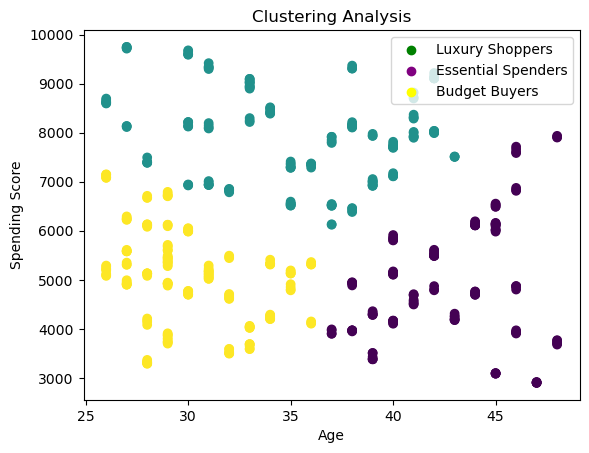

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

file_name = "customer_master.csv"
file_path = "/Users/ajaychandraas/Library/CloudStorage/OneDrive-IUInternationalUniversityofAppliedSciences/2nd Sem Subjects/Elective A Project BI/Data/" + file_name
data = pd.read_csv(file_path)

df = pd.DataFrame(data)

# Select features for clustering
selected_columns = ['Age', 'Spending_Score']
X = df[selected_columns]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)



# Assign labels based on cluster
df['Cluster_Label'] = df['Cluster'].map({
    0: 'Essential Spenders',
    1: 'Budget Buyers',
    2: 'Luxury Shoppers'
})

# Visualize the clusters with labels (without the default label)
for label, color in zip(df['Cluster_Label'].unique(), ['green', 'purple', 'yellow']):
    plt.scatter([], [], c=color, label=label)

plt.scatter(df['Age'], df['Spending_Score'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Clustering Analysis')
plt.legend()
plt.show()